In [2]:
import csv
import requests
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

### Penetracion

In [3]:
df_penetracion = pd.read_csv('../data/processed/penetracion.csv')

In [4]:
df_penetracion

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.21,24.15,Oct-Dic 2022
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021
5,2021,3,70.58,21.98,Jul-Sept 2021
6,2021,2,69.24,21.55,Abr-Jun 2021
7,2021,1,67.95,21.13,Ene-Mar 2021
8,2020,4,67.62,21.01,Oct-Dic 2020
9,2020,3,66.31,20.59,Jul-Sept 2020


In [5]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB



| Provincia | Promedio de habitantes por hogar |
|-----------|------------------------------------|
| Buenos Aires | 4.11 |
| Argentina (total) | 3.24 |

Los datos mostrados en la tabla provienen del Censo Nacional de 2010, realizado por la Dirección General de Estadísticas y Censos (DGEC) de Argentina. El promedio de habitantes por hogar es calculado dividiendo el total de habitantes de cada provincia por el número de hogares. La fuente original de estos datos es el archivo CSV del censo, que puede ser accedido a través del sitio web de la DGEC.


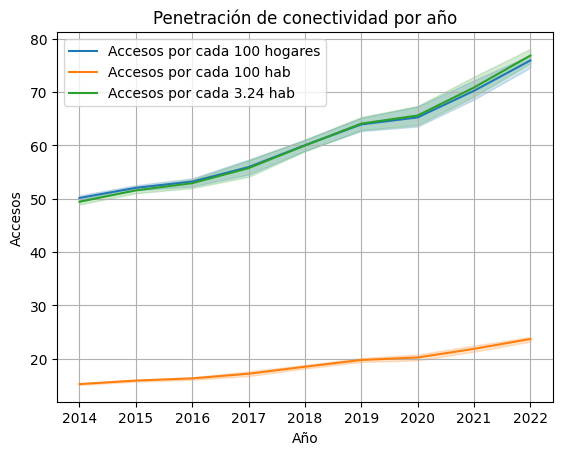

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de línea para 'Accesos por cada 100 hogares'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hogares', label='Accesos por cada 100 hogares')

# Gráfico de línea para 'Accesos por cada 100 hab'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hab', label='Accesos por cada 100 hab')

# Calcular 'Accesos por cada 3.24 hab'
df_penetracion['Accesos por cada 3.24 hab'] = df_penetracion['Accesos por cada 100 hab'] * 3.24

# Gráfico de línea para 'Accesos por cada 3.24 hab'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 3.24 hab', label='Accesos por cada 3.24 hab')

plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Penetración de conectividad por año')
plt.grid()
plt.legend()
plt.show()


Notamos un aumento proporcionalmente correlacionado entre los accesos por cada 100 habitantes y 100 hogares.     
Hay una significativa diferencia entre la cantidad neta de accesos, por lo que el volumen de datos es distinto.     
Contemplando los datos del censo de 2010 de Argentina, extraemos el promedio general de habitantes que residen en un mismo hogar (3.24), multiplindo los accesos por cada 100 habitantes y observando así una completa correlación de los datos. 

### Penetracion Provincia

### Accesos Velocidad por Provincia

In [40]:
df_accesos_velocidad = pd.read_csv('../data/processed/accesos_velocidad.csv')

In [101]:
df_accesos_velocidad

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,168759
...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,161,1625,24972,1,1,0,0,26760
860,2014,1,Santa Fe,8456,124468,345225,20328,6845,23,668,506013
861,2014,1,Santiago Del Estero,1234,10531,22817,2422,109,0,0,37113
862,2014,1,Tierra Del Fuego,12,607,30902,6,0,0,0,31527


In [41]:
df_accesos_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  864 non-null    int64 
 1   Trimestre            864 non-null    int64 
 2   Provincia            864 non-null    object
 3   HASTA 512 kbps       864 non-null    int64 
 4   + 512 Kbps - 1 Mbps  864 non-null    int64 
 5   + 1 Mbps - 6 Mbps    864 non-null    int64 
 6   + 6 Mbps - 10 Mbps   864 non-null    int64 
 7   + 10 Mbps - 20 Mbps  864 non-null    int64 
 8   + 20 Mbps - 30 Mbps  864 non-null    int64 
 9   + 30 Mbps            864 non-null    int64 
 10  Total                864 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 74.4+ KB


In [42]:
df_accesos_velocidad

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,168759
...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,161,1625,24972,1,1,0,0,26760
860,2014,1,Santa Fe,8456,124468,345225,20328,6845,23,668,506013
861,2014,1,Santiago Del Estero,1234,10531,22817,2422,109,0,0,37113
862,2014,1,Tierra Del Fuego,12,607,30902,6,0,0,0,31527


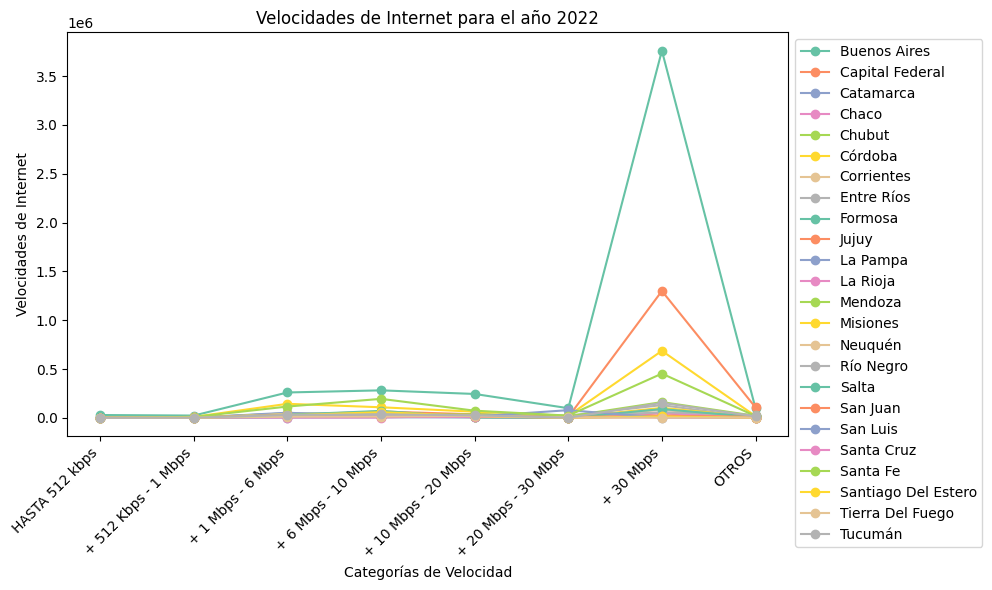

In [39]:
# Lista de columnas de velocidad
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Sidebar para seleccionar año (puedes omitir esta parte si seleccionas un año específico sin interacción del usuario)
selected_year = 2022  # Cambia esto a tu año deseado

# Filtrar datos según la selección del usuario
filtered_data = df_accesos_velocidad[df_accesos_velocidad['Año'] == selected_year]

# Configurar paleta de colores
sns.set_palette("Set2")

# Crear el gráfico de líneas con puntos
plt.figure(figsize=(10, 6))
for provincia in filtered_data['Provincia'].unique():
    datos_provincia = filtered_data[filtered_data['Provincia'] == provincia]
    plt.plot(columnas_velocidad, datos_provincia[columnas_velocidad].iloc[0], marker='o', label=provincia)

# Configurar etiquetas y título
plt.xlabel('Categorías de Velocidad')
plt.ylabel('Velocidades de Internet')
plt.title(f'Velocidades de Internet para el año {selected_year}')
plt.xticks(rotation=45, ha='right')

# Posiciona la leyenda fuera del gráfico y ajusta el bbox_to_anchor para evitar que tape el gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [77]:
import pandas as pd

# Lista de provincias a excluir
provincias_excluidas = ['Buenos Aires', 'Capital Federal', 'Mendoza', 'Córdoba', 'Santa Fe']

# Filtrar datos para el año 2022 excluyendo ciertas provincias
df_2022_sin_excluidas = df_accesos_velocidad[(df_accesos_velocidad['Año'] == 2022) &
                                              (~df_accesos_velocidad['Provincia'].isin(provincias_excluidas))]

# Filtrar las columnas de velocidad de interés y sumar los valores
velocidades_interes = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps']
total_velocidades_interes_excluidas = df_2022_sin_excluidas[velocidades_interes].sum(axis=1).sum()

# Sumar los valores en la columna 'Total' para las provincias excluidas
total_general_excluidas = df_2022_sin_excluidas['Total'].sum()

# Filtrar datos para el año 2022 incluyendo todas las provincias
df_2022_todas = df_accesos_velocidad[(df_accesos_velocidad['Año'] == 2022)]

# Sumar los valores en la columna 'Total' para todas las provincias
total_general_todas = df_2022_todas['Total'].sum()

# Calcular el porcentaje de las velocidades de interés con respecto al total general excluyendo ciertas provincias
porcentaje_excluidas = (total_velocidades_interes_excluidas / total_general_excluidas) * 100
porcentaje_todas = (total_velocidades_interes_todas / total_general_todas) * 100

# Mostrar los porcentajes excluyendo ciertas provincias y para todas las provincias
print("Porcentaje de las velocidades de interés con respecto al total general excluyendo ciertas provincias:", porcentaje_excluidas, "%")
print("Porcentaje de las velocidades de interés con respecto al total general para todas las provincias:", porcentaje_todas, "%")


Porcentaje de las velocidades de interés con respecto al total general excluyendo ciertas provincias: 39.14014910228135 %
Porcentaje de las velocidades de interés con respecto al total general para todas las provincias: 22.51676914429594 %


/tmp/ipykernel_132281/1552188088.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_132281/1552188088.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



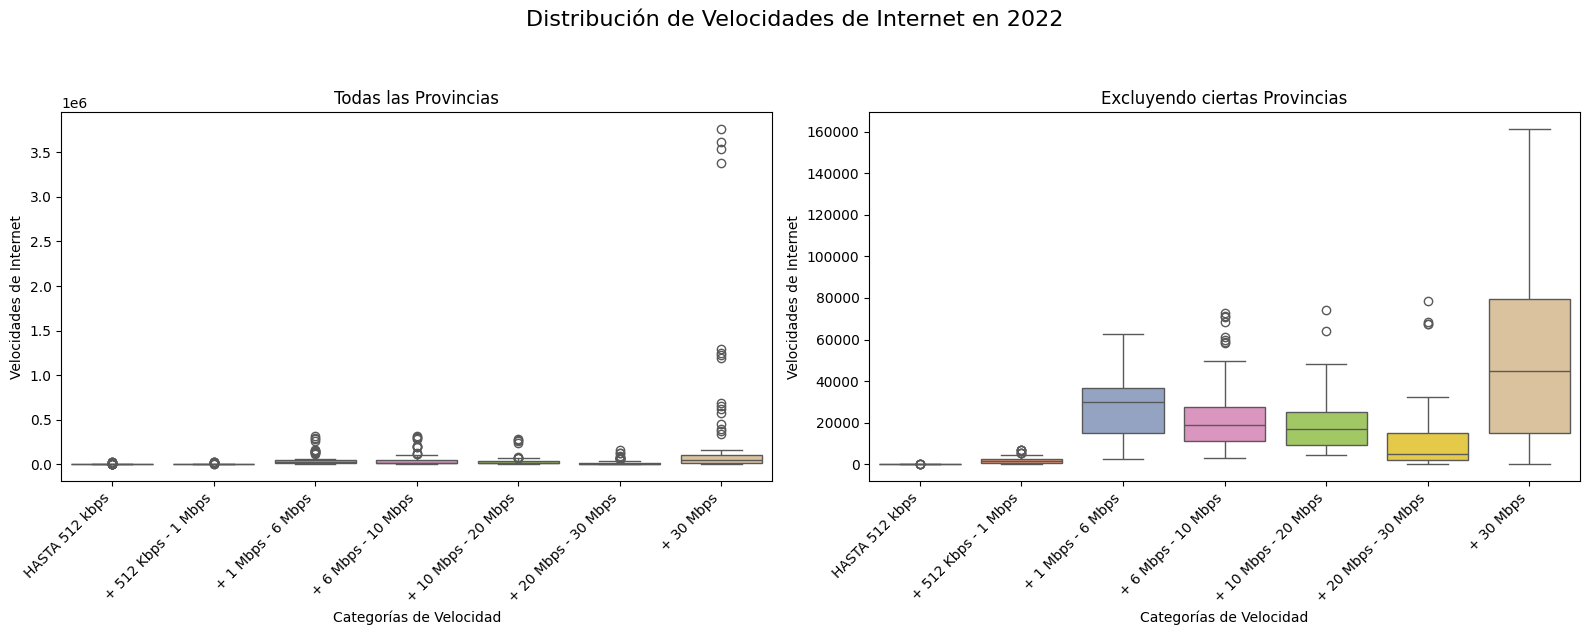

In [85]:
# Filtrar datos para el año 2022
df_2022 = df_accesos_velocidad[df_accesos_velocidad['Año'] == 2022]

# Filtrar datos para el año 2022 excluyendo Buenos Aires, Capital Federal, Córdoba y Santa Fe
provincias_excluidas = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_2022_sin_excluidas = df_2022[~df_2022['Provincia'].isin(provincias_excluidas)]

# Crear subplots para el boxplot general y el boxplot excluyendo ciertas provincias
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot para el boxplot general
sns.boxplot(data=df_2022[columnas_velocidad], ax=axes[0])
axes[0].set_xticklabels(columnas_velocidad, rotation=45, ha='right')
axes[0].set_title('Todas las Provincias')
axes[0].set_xlabel('Categorías de Velocidad')
axes[0].set_ylabel('Velocidades de Internet')

# Subplot para el boxplot excluyendo ciertas provincias
sns.boxplot(data=df_2022_sin_excluidas[columnas_velocidad], ax=axes[1])
axes[1].set_xticklabels(columnas_velocidad, rotation=45, ha='right')
axes[1].set_title('Excluyendo ciertas Provincias')
axes[1].set_xlabel('Categorías de Velocidad')
axes[1].set_ylabel('Velocidades de Internet')

# Titulo general
plt.suptitle('Distribución de Velocidades de Internet en 2022', y=1.05, fontsize=16)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


/tmp/ipykernel_132281/508406383.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_132281/508406383.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_132281/508406383.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_132281/508406383.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



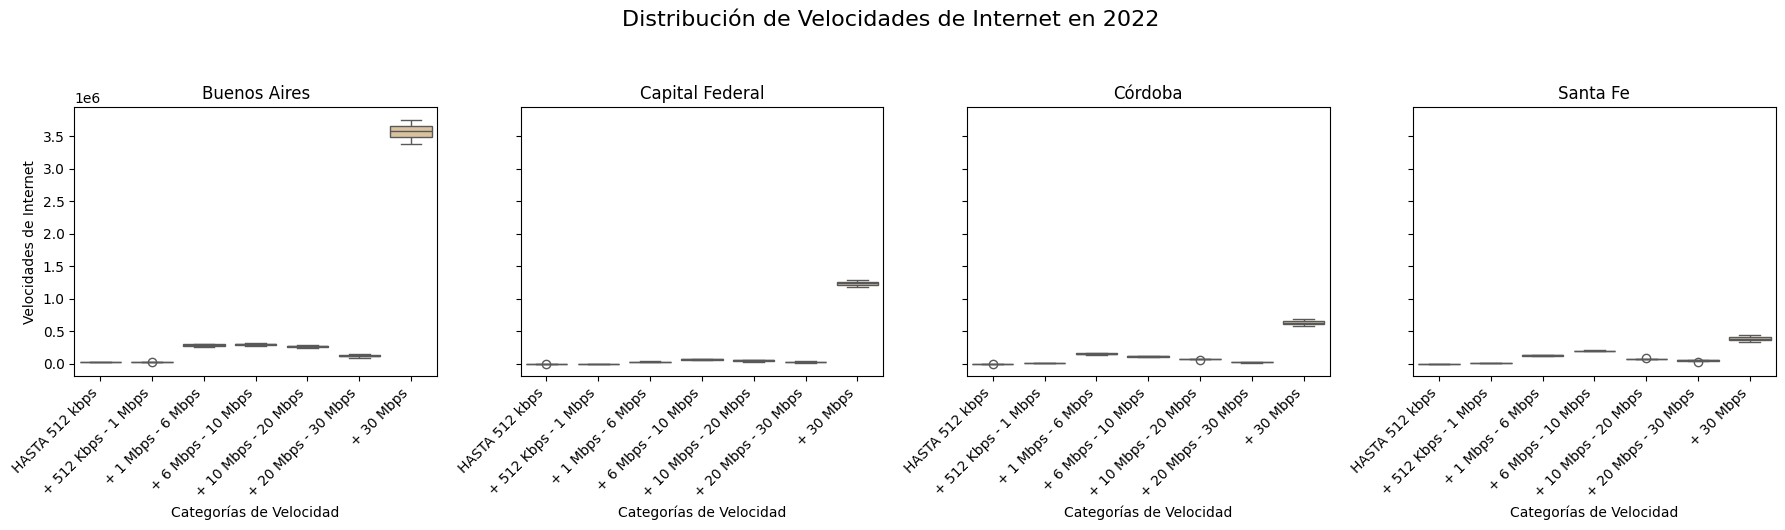

In [82]:
# Lista de provincias seleccionadas
provincias_seleccionadas = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']

# Filtrar datos para las provincias seleccionadas en 2022
df_provincias_2022 = df_accesos_velocidad[(df_accesos_velocidad['Año'] == 2022) &
                                           (df_accesos_velocidad['Provincia'].isin(provincias_seleccionadas))]

# Lista de columnas de velocidad
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']

# Crear subplots para las provincias seleccionadas
fig, axes = plt.subplots(1, len(provincias_seleccionadas), figsize=(18, 5), sharey=True)

for i, provincia in enumerate(provincias_seleccionadas):
    # Subplot para la provincia actual
    sns.boxplot(data=df_provincias_2022[df_provincias_2022['Provincia'] == provincia][columnas_velocidad], ax=axes[i])
    axes[i].set_xticklabels(columnas_velocidad, rotation=45, ha='right')
    axes[i].set_title(provincia)
    axes[i].set_xlabel('Categorías de Velocidad')
    axes[i].set_ylabel('Velocidades de Internet')

# Titulo general
plt.suptitle('Distribución de Velocidades de Internet en 2022', y=1.05, fontsize=16)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


### internet_historico.csv

In [111]:
df_internet_historico = pd.read_csv('../data/processed/internet_historico.csv')

In [112]:
df_internet_historico

,Año,Trimestre,Provincia,Mbps (Media de bajada),Tasa de Crecimiento
0,2014,1,Buenos Aires,3.73,0.00
1,2014,1,Capital Federal,4.02,0.00
2,2014,1,Catamarca,2.80,0.00
3,2014,1,Chaco,3.26,0.00
4,2014,1,Chubut,3.18,0.00
...,...,...,...,...,...
859,2022,4,Santa Cruz,14.33,1.14
860,2022,4,Santa Fe,90.30,2.00
861,2022,4,Santiago Del Estero,34.40,1.94
862,2022,4,Tierra Del Fuego,13.48,1.22


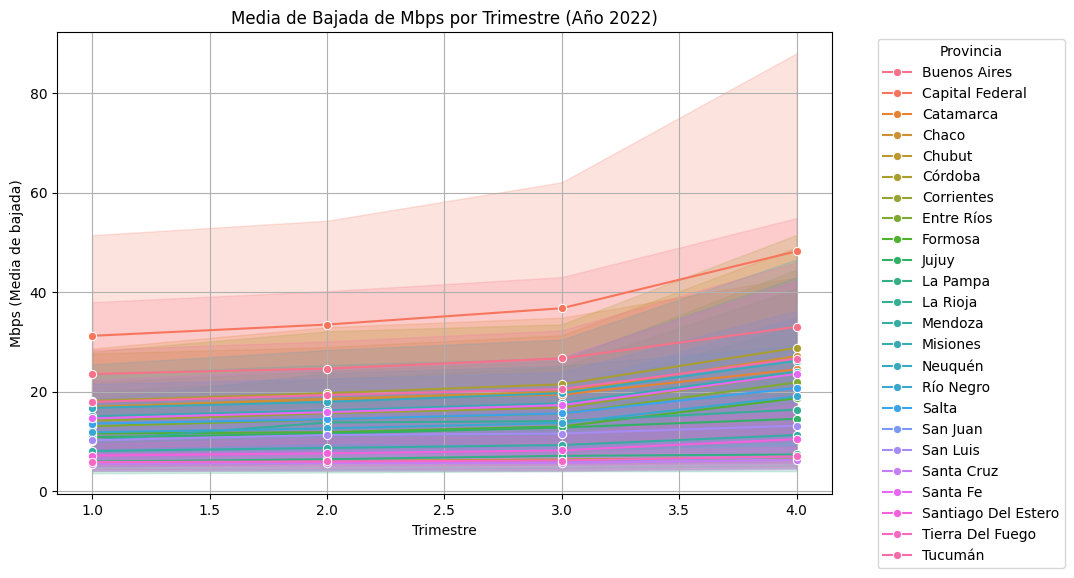

In [105]:
# Crear un gráfico de líneas usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Trimestre', y='Mbps (Media de bajada)', data=df_internet_historico, hue='Provincia', marker='o')
plt.title('Media de Bajada de Mbps por Trimestre (Año 2022)')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


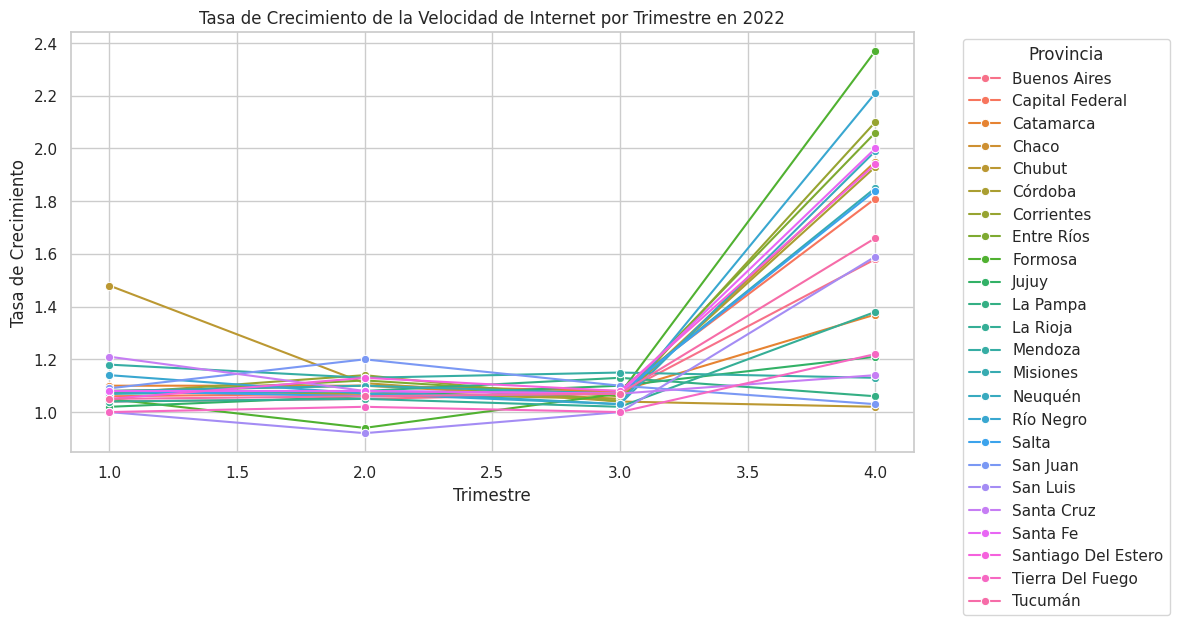

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para el año 2022
df_internet_2022 = df_internet_historico[df_internet_historico['Año'] == 2022]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de línea para la tasa de crecimiento en 2022
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_internet_2022, x='Trimestre', y='Tasa de Crecimiento', hue='Provincia', marker='o')

# Configurar el título y las etiquetas de los ejes
plt.title('Tasa de Crecimiento de la Velocidad de Internet por Trimestre en 2022')
plt.xlabel('Trimestre')
plt.ylabel('Tasa de Crecimiento')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


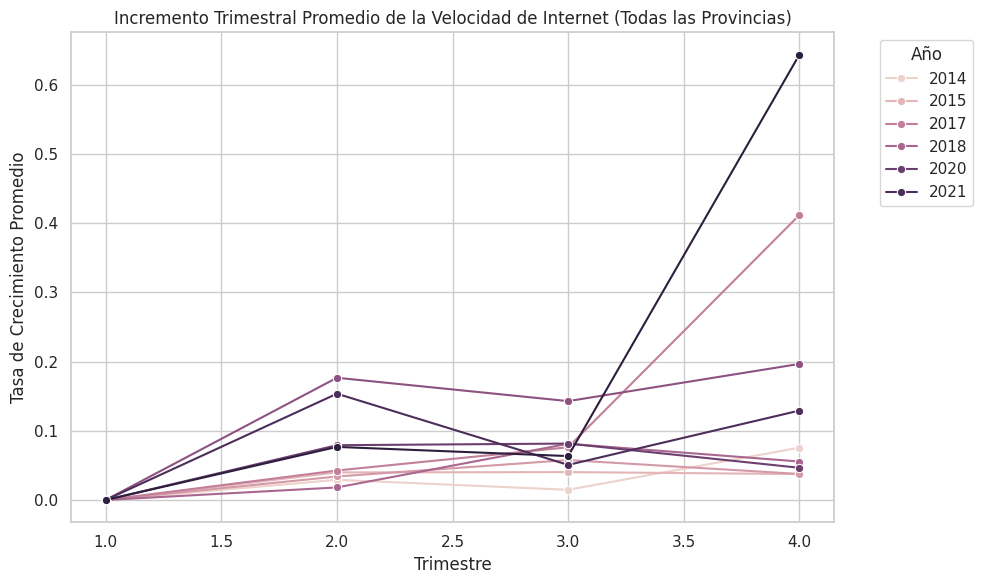

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando la tasa de crecimiento trimestral por año y provincia
df_internet_historico['Tasa de Crecimiento'] = df_internet_historico.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].pct_change().fillna(0)

# Calculando el incremento trimestral promedio para todas las provincias por año
incremento_trimestral_promedio = df_internet_historico.groupby(['Año', 'Trimestre'])['Tasa de Crecimiento'].mean().reset_index()

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de línea para el incremento trimestral promedio por año
plt.figure(figsize=(10, 6))
sns.lineplot(data=incremento_trimestral_promedio, x='Trimestre', y='Tasa de Crecimiento', hue='Año', marker='o')

# Configurar el título y las etiquetas de los ejes
plt.title('Incremento Trimestral Promedio de la Velocidad de Internet (Todas las Provincias)')
plt.xlabel('Trimestre')
plt.ylabel('Tasa de Crecimiento Promedio')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
